# Regresión Lineal
---

En estadística la regresión lineal o ajuste lineal es un modelo matemático usado para aproximar la relación de dependencia entre una variable dependiente Y, las variables independientes Xi y un término aleatorio ε.  
*Para simplificar, empezaremos la explicación con una única variable independiente; luego:* Ŷ = f(X) + ε.  
*Este sería el caso en el que, por ejemplo, quisiéramos saber la relación entre las horas de estudio y la nota que sacaré en un examen* 

<img src='https://upload.wikimedia.org/wikipedia/commons/3/3a/Linear_regression.svg'>

En el contexto de un problema real, la inforamción que dispondremos serán las observaciones que corresponden con los puntos azules. A través de ellos, queremos explicar el compartamiento de la respuesta en función de los valores de las variables independiente **para todo el rango de valores** que dichas variables puedan tomar, de la mejor manera posible. Esto quiere decir, **minimizando** la desviación del resultado del modelo con los valores reales.  

El método más común utilizado para encontrar esta minimización es conocido como el **método de mínimos cuadrados**.

### Mínimos Cuadrados
---

Es importante tener claros conceptos que son muy sencillos, y que son fundamentales ya que son la piedra angular 
de todo lo demás que se construye encima de ellos. Este método es uno de estos conceptos que, insisto, son muy sencillos.  

Recapitulando la definición de modelo, al final lo que vamos a conseguir es una **función** que, como todas las demas, ante determinados valores me va a dar una salida. Como su nombre indica en el modelo que vamos a construir en esta sección (regresión **lineal**), la forma de las salidas del modelo será una línea recta.  

Para todos los modelos, las salidas calculadas se definen con un *sombrero* encima del nombre de la variable, **ŷ**, y suele recibir el nombre de ajuste (si es en el conjunto de entrenamiento) o predición (si en el conjunto de validación).   

Por tanto, el error de un ajuste, será la diferencia entre el valor real (el valor que ya habíamos observado para una Xi), y la salida que da nuestro modelo cuando sustituimos Xi, como se puede ver en el siguiente gráfico. 

ε = ŷ - y = ŷ - f(x)

<img src='http://www.sc.ehu.es/sbweb/fisica/cinematica/regresion/Cine_23.gif'>

Ahora ya es fácil entender lo que hace el método de mínimos cuadrados. Y es que, como su nombre indica, buscará aquella recta que minimice la suma de los cuadrados de los errores ε.  

**Nota:** en realidad minimiza el error cuadrático medio. Pero si nos damos cuenta, hacer la media del error es simplemente dividir la suma que ya hemos calculado entre el número total de muestras, y hacer la raíz cuadrada de todo eso (porque era la suma de los cuadrados de los errores).  



### Hipótesis de la Regresión Lineal
---
**Muy Importante**

### Creación del modelo
---
Ha llegado el momento de dar forma a f(X).  
Como estamos simplificando para el caso de 1 sola variables independiente, nuestro modelo tendrá la siguiente forma inicial:

<img src='../Imagenes/regresion_lineal/ec_RL.png'>  

β0 y β1 son los coeficientes que tenemos que determinar. β0 recibe el nombre de **intercept** y es la ordenada en el origen; mientras que β1 recibe el nombre de **slope** y es la pendiente de nuestra recta.  

Calculando la esperanza de Y, y sabiendo que los errores siguen una distribución normalm εi ∼ N(0,σ2):

<img src='../Imagenes/regresion_lineal/ec_RL_y_hat.png'>  

Y como queremos minimizar la suma de los cuadrados de los errores, podemos diferenciar con respecto a β0 y β1 para determinar que valores de estos parámetros minimizan el valor de dicha suma. Es decir, resolver un problema básico de optimización haciendo que las derivadas valgan 0:

<img src='../Imagenes/regresion_lineal/ec_RL_d.png'>  

Desarrollando las integrales nos queda un sistema de 2 ecuaciones con 2 incóginitas, β0 y β1.

<img src='../Imagenes/regresion_lineal/ec_RL_solv.png'>  

# Código
---

## Crear datos
---

La manera más rápida y segura muchas veces de comprobar que los modelos que creamos tienen sentido, es probar con datos generados artificialmente, se suele denominar **syntetic data**. Crear datos no es más que generar una series de valores para la X, una señal de ruido (valores aleatorios distribuidos de forma normal) que será ε y dar valores a β0 y β1 para generar así los valores de Y.  

Entonces:

In [23]:
import numpy as np

e = np.random.random(10) * 2 # Esto crea 10 valores aleatorios entre 0 y 2
X = np.random.random(10) * 5 # Esto crea 10 valores aleatorios entre 0 y 5
Y = 2 + 3*X + e              # Esto crea 10 valores para las Y en función de X y e

In [24]:
print(e.shape)
print(X.shape)
print(Y.shape)

(10,)
(10,)
(10,)


Este último comando era para ver que actualmente tenemos vectores **unidimensionales**. Si queremos trabajar con otra librería como Pandas, necesitamos 2 dimensiones. Para ajustar podemos utilizar la funcionde Numpy **reshape**

In [25]:
e = e.reshape(10,1)
X = X.reshape(X.shape[0],1)
Y = Y.reshape(-1,1)

print(e.shape)
print(X.shape)
print(Y.shape)

(10, 1)
(10, 1)
(10, 1)


Aquí vemos 3 formas distintas de definir lo que queremos hacer. 
* Poniendo directamente el número 10
* Diciendo que queremos que tenga la misma longitud que previamente X.shape(-1), 
* Diciendo que los que sea necesario para que se ajuste con la otra dimesión, -1.

In [34]:
import pandas as pd

data = np.concatenate((Y, X, e), axis=1)       # Esto acopla las variables que hemos creado por columnas
df = pd.DataFrame(data, columns=['Y', 'X', 'e'])  # Y ahora les damos el formato de tabla gracias a Pandas
df.head(5)   # dataframe.head(n) es una función para mostrar las primeros n filas de la tabla 'dataframe'

,Y,X,e
0,10.943664,2.970188,0.033100
1,5.089787,0.956551,0.220136
2,4.538791,0.675643,0.511864
3,12.557144,3.293462,0.676759
4,10.577999,2.391231,1.404306


Ahora podemos utilizar Matplotlib para en lugar de ver una tabla, producir un gráfico (el poder de las imagénes!)

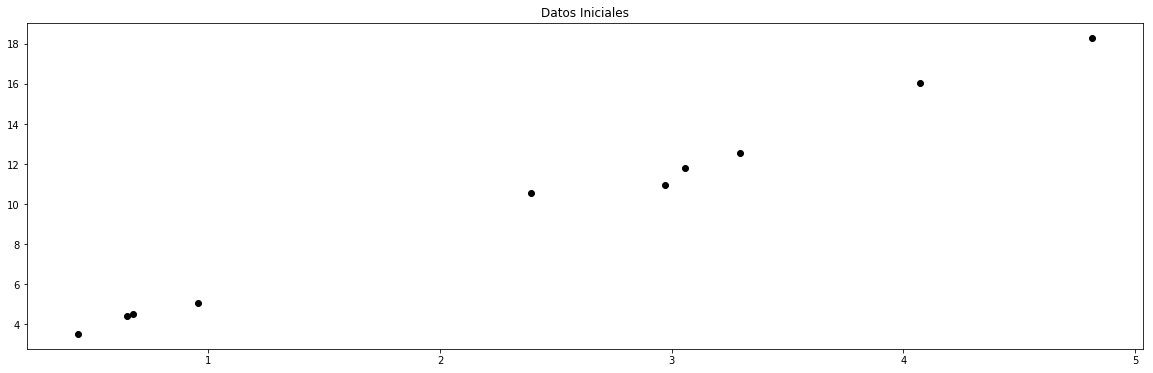

In [49]:
import matplotlib.pyplot as plt
% matplotlib inline

plt.figure(figsize=(20,6))
plt.title('Datos Iniciales')
plt.scatter(X, Y, color='black') # Gráfico de dispersión (puntos)
plt.show()

Vemos que nuestros datos parecen presentar un comportamiento lineal, y por eso decidimos realizar una regresión lineal.  

Vamos entonces a utilizar las ecuaciones que disponemos:

In [42]:
x_media = np.mean(X) # Con numpy.mean(vector) podemos directamente calcular la media de un conjunto de valores
y_media = np.mean(Y) # en forma de vector

print(x_media)
print(y_media)

2.3316962368696665
9.785052768335518


In [45]:
Y - y_media

array([[ 1.15861141],
       [-4.69526531],
       [-5.24626135],
       [ 2.77209091],
       [ 0.79294592],
       [-6.25234204],
       [ 8.52281195],
       [ 2.03555371],
       [ 6.26267766],
       [-5.35082286]])

In [46]:
beta_1 = np.sum((X - x_media)*(Y - y_media)) / np.sum((X - x_media)**2)
beta_0 = y_media - beta_1*x_media

print('β0 = ', beta_0)
print('β1 = ', beta_1)

β0 =  2.0888113755921305
β1 =  3.3007049850866057


Por lo tanto, nuestra ecuación será:

In [47]:
y_hat = beta_0 + beta_1*X

Ahora, podemos representar la salida de los valores de nuestro modelo para los valores de la X y comprobar qué tal está ajustandose a los datos:

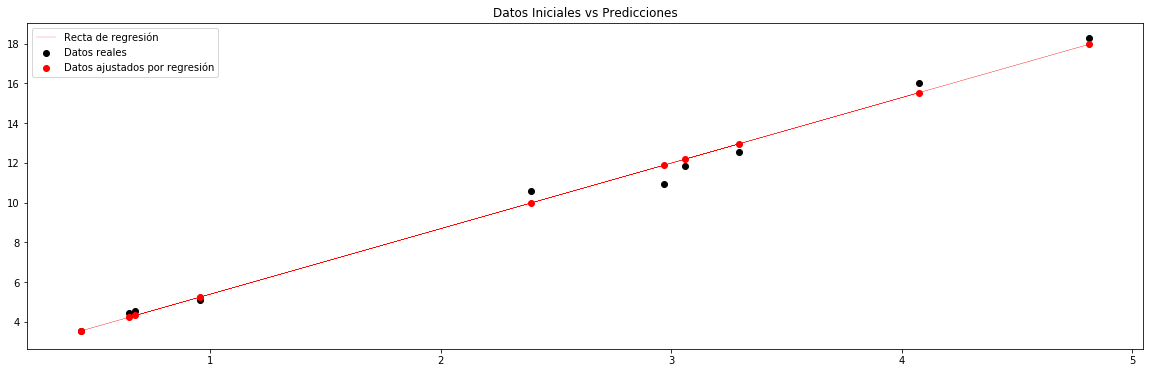

In [53]:
plt.figure(figsize=(20,6))
plt.title('Datos Iniciales vs Predicciones')
plt.scatter(X, Y, color='black', label='Datos reales') 
plt.scatter(X, y_hat, color='red', label='Datos ajustados por regresión') 
plt.plot(X, y_hat, linewidth=0.2, color='red', label='Recta de regresión')
plt.legend()
plt.show()

**RMSE** (*Root Mean Squared Error*) es una medida para medir la precisión del modelo. Es una medida del error cuádratico medio, que es precisamente lo que buscábamos minimizar. Su fórmula es:
<img src='https://lh4.googleusercontent.com/GD-CcmSDeb1ficAt41u0ZDtFd7syTpJGc_NJ3NGTlQtY-rikX7Tqn9DMaG4b5JtWlKOI6RBayJZNxr4h5SHL2SeKX9ceQCLj9uGTuqeAfgS0EDjh20oZnImahJ2oUa3up9E7KjI'>

In [51]:
errores = y_hat - Y 
num_errores = len(errores) # El número de errores es equivalente a la longitud del vector (cúantos errores hay)
RMSE = np.sqrt(np.sum(errores**2)/num_errores)
print('RMSE = %.2f' % RMSE)

RMSE = 0.45


# Conclusión
---
Hemos visto como funciona la regresión lineal.  

Las buenas noticias, es que existen librerías que podemos utilizar para no necesitar hacer todas las operaciones siempre. En los siguientes links tenemos un caso más complicado que este ejemplo y se resolverá con librerías de python y de R. ¡A por ello!

[Regresión Lineal Simple](https://github.com/PabloRR100/Curso-Machine-Learning-Esp/blob/master/4%20-%20Aprendizaje%20Supervisado/4.1.%20Regresión/4.1.2%20-%20Regresión%20Linear%20y%20Polinómica/4.1.1.1%20RLS%20-%20Python.ipynb)  
[Regresión Lineal Múltiple](https://github.com/PabloRR100/Curso-Machine-Learning-Esp/blob/master/4%20-%20Aprendizaje%20Supervisado/4.1.%20Regresión/4.1.2%20-%20Regresión%20Linear%20y%20Polinómica/4.1.1.2%20RLM%20-%20Python.ipynb)  
[Regresión Polinómica](https://github.com/PabloRR100/Curso-Machine-Learning-Esp/blob/master/4%20-%20Aprendizaje%20Supervisado/4.1.%20Regresión/4.1.2%20-%20Regresión%20Linear%20y%20Polinómica/4.1.1.3%20PLS%20-%20Python.ipynb)  